# Clase 6 de agosto de 2021 #
## Sistemas de ecuaciones lineales ##
![XKCD](img/1838.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Sistemas de ecuaciones lineales ###
Una ecuación lineal es una igualdad que tiene la forma:  
$\sum{a_i x_i}=y$  
Un sistema de ecuaciones lineales es un set de ecuaciones lineales que comparten las mismas variables. Por ejemplo:  
$a_1x_1 + a_2x_2 = y_1$  
$a_3x_1 + a_4x_2 = y_2$  

La forma matricial de un sistema de ecuaciones lineales se expresa como $Ax=y$  
$\begin{bmatrix}
a_{1,1} & a_{1,2} & \dots & a_{1,n}\\
a_{2,1} & a_{2,2} & \dots & a_{2,n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{m,1} & a_{m,2} & \dots & a_{m,n}
\end{bmatrix}
\begin{bmatrix}
x_{1}\\
x_{2}\\
\vdots\\
x_{m}
\end{bmatrix} 
=
\begin{bmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{m}
\end{bmatrix} $  

Soluciones a sistemas de ecuaciones lineales:  
- Caso 1: No hay solución.
- Caso 2: Existe una única solución.
- Caso 3: Existen infinitas soluciones.  

Si tenemos un sistema como el anterior $Ax=y$ donde $A$ es una matriz de $m \times n$ significa que tenemos un sistema con $m$ ecuaciones y $n$ incógnitas.

**Ejemplo**: Escribe en forma matricial el siguiente sistema de ecuaciones:  
\begin{align*}
4x+3y-5z&=2\\
-2x-4y+5z&=5\\
7x+8y&=-3\\
x+2z&=1\\
9+y-6z&=6
\end{align*}

**¿Cómo se resuelven?**
- Método de eliminación gaussiana
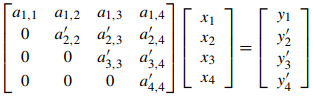

- Método de eliminación de Gauss-Jordan
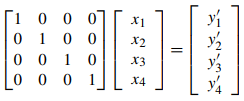

In [ ]:
# Metodo de eliminacion de Gauss Jordan


**Factorización**
- Factorización LU: Se utiliza en matrices cuadradas y descompone una matriz en dos componentes.
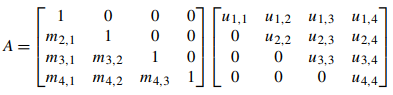

**¿Cómo se resuelven?**
- Método de Gauss-Siedel (método iterativo)

In [ ]:
# Algoritmo Gauss Siedel


In [ ]:
# Resolver ecuaciones lineales con numpy


### Ejercicio ###
Construcción de curva yield

In [ ]:
bonos = pd.DataFrame({
    'Bono': ["A", "B", "C"],
    'Precio': [947.12, 904.29, 980.99],
    'Valor Nominal': [1000,1000,1000],
    'Tasa Cupon': ["5%","8%","10%"],
    'Años a Vencimiento': [2,3,4]
})

**Más métodos de factorización**
- Factorización QR: se utiliza en matrices $m\times n$.  
$A=Q\cdot R$  
En donde $Q$ es una matriz $m \times m$ y $R$ es una matriz triangular superior de tamaño $m \times n$

- Factorización de Cholesky: Se utiliza en matrices cuadradas positivas.  
$A=L\cdot L^T$  
en donde $L$ es una matriz triangular inferior.

- Eigenvalores y eigenvectores: Se utiliza en matrices cuadradas.
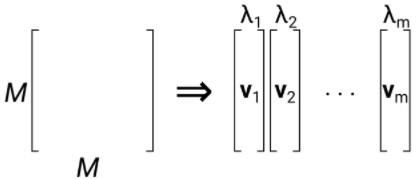

Ecuación de eigenvalores  
**$Av=\lambda v$**

In [3]:
A = np.array([
    [1,2],
    [3,-4]
])
v = np.array([2,1])
lambd = 2

array([4, 2])

**Principal Components Analysis (PCA)**  
El objetivo del PCA es identificar una base tal que cada vector que conforma la base maximiza la covarianza manteniendo la ortogonalidad a todos los demás vectores que conforman la base.

Documentación Quandl para obtener las tasas yield:  
https://www.quandl.com/tools/python  
https://github.com/quandl/quandl-python/blob/master/FOR_ANALYSTS.md

In [ ]:
import quandl
data = quandl.get("USTREASURY/YIELD", start_date="2020-09-01", end_date="2021-08-01")
data